# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [ ]:
# Haga el cálculo aquí
movpropio = 1 #mas/yr
distancia = 0.5 #grados
grados_mas = 0.5 * 3600*1000 #mas
tiempo = grados_mas / movpropio #años
print ("El tiempo para recorrer 0.5 grados de una estrella es " + str(tiempo) + " años")

El tiempo para recorrer 0.5 grados de una estrella es 1800000.0 años


**Comentario:** Se observa que el cálculo da un número muy grande de tiempo para lo que tiene que recorrer un estrella en el cielo.

### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [67]:
path_archivo = '/ngc5694_pm.csv'
data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [68]:
# Muestra las columnas aquí
print("Columnas")
print(data.columns) #se muestran los nombres de las columnas

Columnas
Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')


In [69]:
# Muestra el DataFrame aquí
print("Elementos del DataFrame")
print(data.head()) #se muestra una parte de los elementos de las columnas

Elementos del DataFrame
   Unnamed: 0          ra        dec      pmra     pmdec
0           0  219.370629 -27.312548  0.053134 -1.674613
1           1  219.373996 -27.243801 -0.960711 -0.283708
2           2  219.363458 -27.213113  0.674957 -1.741153
3           3  219.336931 -27.172985 -0.057975 -0.564131
4           4  219.463706 -27.189408 -0.438914 -0.487856


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [70]:
pmra = data["pmra"] #datos de la columna pmra
pmdec = data["pmdec"] #datos de la columna pmdec

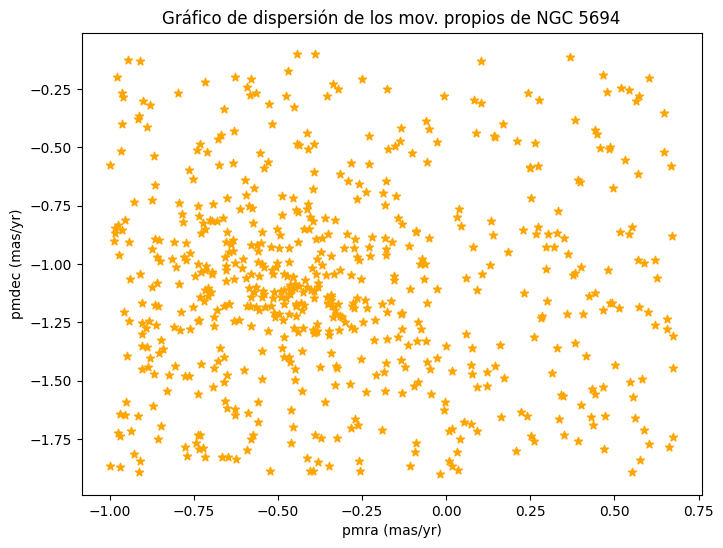

In [72]:
# Haga el gráfico en esta celda
plt.figure(figsize=(8, 6))
plt.scatter(pmra,pmdec, color="orange", marker="*") #grafico de dispersion de pmra vs pmdec
plt.xlabel("pmra (mas/yr)")
plt.ylabel("pmdec (mas/yr)")
plt.title("Gráfico de dispersión de los mov. propios de NGC 5694")
plt.show()

**Comentario:** Se observa en el gráfico que hay más estrellas en la parte izquierda central.

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [75]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

print("Promedio pmra: " + str(mu_pmra))
print("Desviación estándar pmdec: " + str(std_pmra))
print("Promedio pmra: " + str(mu_pmdec))
print("Desviación estándar pmdec: " + str(std_pmdec))

Promedio pmra: -0.3123486977209311
Desviación estándar pmdec: 0.43823620785185174
Promedio pmra: -1.0897362576861138
Desviación estándar pmdec: 0.42760876013101434


**Comentario**: se printearon los promedios y desviación para ver/verificar los cálculos

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [76]:
from scipy.stats import norm

x_pmra = np.linspace(-1.5,1,300)
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra) # se calcula la distribución gaussiana con la función norm para pmra

x_pmdec = np.linspace(-2.5,0.5,300)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec) # se calcula la distribución gaussiana con la función norm para pmdec

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

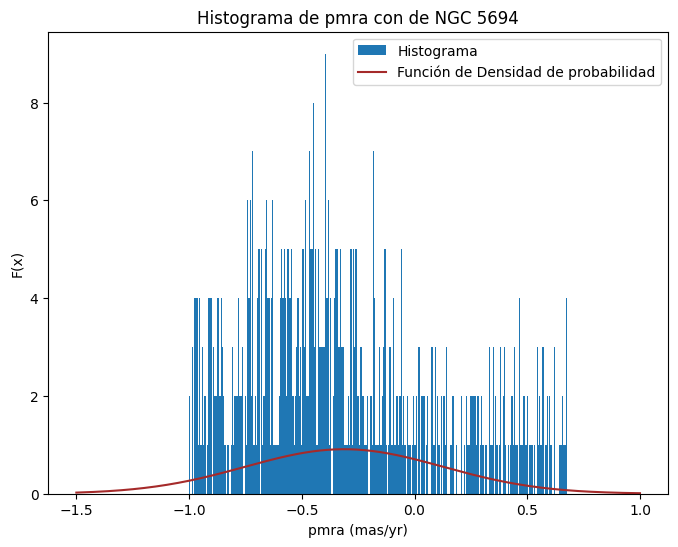

In [79]:
plt.figure(figsize=(8, 6))
plt.hist(pmra, bins=300, label = 'Histograma') # gráfico del histograma
plt.plot(x_pmra, fx_pmra, color='brown', label = 'Función de Densidad de probabilidad') # gráfico de la distribucción gaussiana
plt.xlabel("pmra (mas/yr)")
plt.ylabel("F(x)")
plt.title("Histograma de pmra con de NGC 5694")
plt.legend()
plt.show()

**Comentario**: Se puede ver que los datos del histograma son mayores a la curva de distribución gaussiana.

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

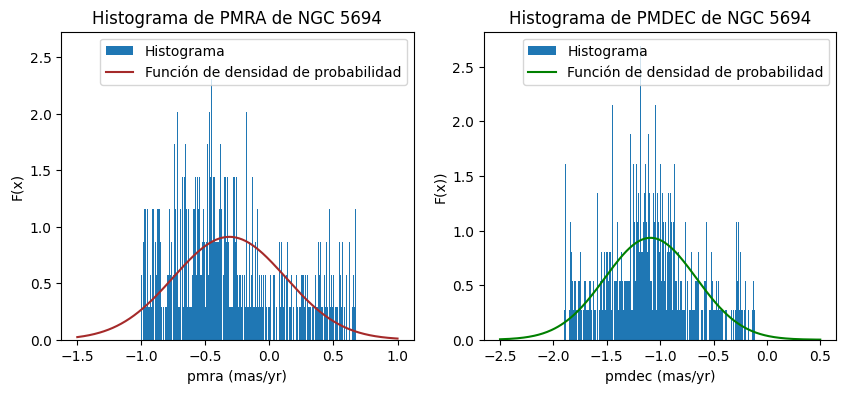

In [81]:
plt.figure(figsize=(10, 4))

 # Gráfico de pmra
plt.subplot(1,2,1)
plt.hist(pmra, bins=300, label = 'Histograma', density=True) # gráfico del histograma
plt.plot(x_pmra, fx_pmra, color='brown', label = 'Función de densidad de probabilidad') # gráfico de la distribucción gaussiana
plt.xlabel("pmra (mas/yr)")
plt.ylabel("F(x)")
plt.title("Histograma de PMRA de NGC 5694")
plt.legend()

 # Gráfico de pmdec
plt.subplot(1,2,2)
plt.hist(pmdec, bins=300, label = 'Histograma', density=True) # gráfico del histograma
plt.plot(x_pmdec, fx_pmdec, color='green', label = 'Función de densidad de probabilidad') # gráfico de la distribucción gaussiana
plt.xlabel("pmdec (mas/yr)")
plt.ylabel("F(x))")
plt.title("Histograma de PMDEC de NGC 5694")
plt.legend()
plt.show()

**Comentario:** La función se acerca más al histograma

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

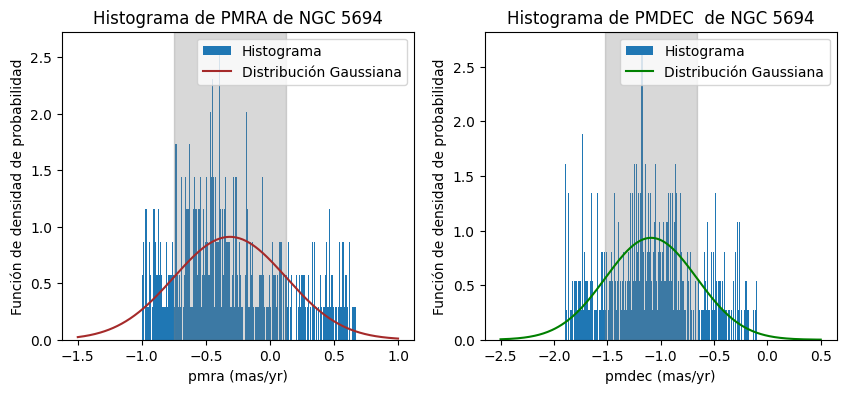

In [ ]:
plt.figure(figsize=(10, 4))

 # Gráfico de pmra
plt.subplot(1,2,1)
plt.hist(pmra, bins=300, label = 'Histograma', density=True) # gráfico del histograma
plt.plot(x_pmra, fx_pmra, color='brown', label = 'Distribución Gaussiana') # gráfico de la distribucción gaussiana
plt.xlabel("pmra (mas/yr)")
plt.ylabel("Función de densidad de probabilidad")
plt.title("Histograma de PMRA de NGC 5694")
plt.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, alpha=0.3, color='gray') # franja vertical de μ±σ
plt.legend()

 # Gráfico de pmdec
plt.subplot(1,2,2)
plt.hist(pmdec, bins=300, label = 'Histograma', density=True) # gráfico del histograma
plt.plot(x_pmdec, fx_pmdec, color='green', label = 'Distribución Gaussiana')  # gráfico de la distribucción gaussiana
plt.xlabel("pmdec (mas/yr)")
plt.ylabel("Función de densidad de probabilidad")
plt.title("Histograma de PMDEC  de NGC 5694")
plt.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, alpha=0.3, color='gray')# franja vertical de μ±σ
plt.legend()
plt.show()

**Comentario**: ahora la curva de PDF se acerca más al histograma, además se le suma la franja de μ±σ que representa la variabilidad de los datos en torno al promedio.

Según las gaussianas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Observando los gráficos, se puede estimar:\
pmra = -0,39 (mas/yr)\
pmdec = -1,15 (mas/yr)


# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [83]:
# Lea y muestre el DataFrame aquí
data = pd.read_csv('/data_spectra.csv')
print(data.head())

   Unnamed: 0          Wlth     obs_1     obs_2     obs_3     obs_4     obs_5  \
0           0  13893.158801  0.673065  1.048759  1.135927  1.365672  1.205216   
1           1  13894.381791  1.218438  1.384774  0.647763  1.286700  1.223776   
2           2  13895.604780  1.244496  0.775893  1.213005  0.898531  1.203176   
3           3  13896.827769  1.395414  0.853016  0.929927  0.617134  1.101129   
4           4  13898.050759  1.013531  0.891468  1.125626  1.354080  0.681703   

      obs_6     obs_7     obs_8  ...    obs_11    obs_12    obs_13    obs_14  \
0  0.777480  0.777436  0.723454  ...  0.851846  0.828067  0.964739  0.894189   
1  1.295540  1.289402  0.979057  ...  0.792874  0.792945  1.115174  1.228799   
2  1.130615  1.133467  0.645016  ...  1.221805  1.081824  0.871400  1.229938   
3  1.363642  0.810799  0.901758  ...  0.847701  1.200020  1.196751  1.047428   
4  0.968364  0.630361  1.299735  ...  0.612065  0.706618  0.696333  1.021694   

     obs_15    obs_16    obs_17 

### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** Se pueden ver que hay 3 líneas de emisión que están alrededor de la longitud de onda de 15250 (m).

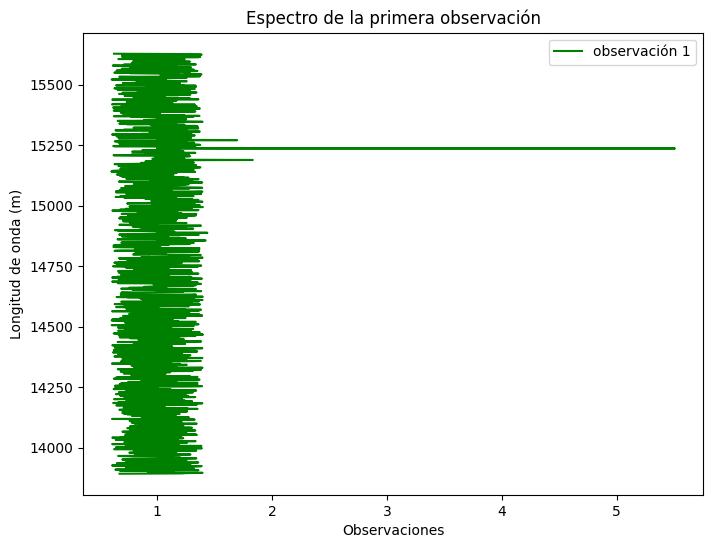

In [84]:
# Grafique aquí
plt.figure(figsize=(8, 6))
plt.plot(data["obs_1"], data["Wlth"], label="observación 1", color="green")
plt.xlabel("Observaciones")
plt.ylabel("Longitud de onda (m)")
plt.title("Espectro de la primera observación")
plt.legend()
plt.show()

Se puede ver que en las observaciones 1, hay muchas líneas de emisión y en $\approx$ 15250 (m) hay líneas de emisión más claras.

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Para estimar el valor medio, usamos la función ".mean()" y luego se le resta esto a la lista de obs_1, creando una nueva list con esto valores corregidos.
Luego ploteamos de la misma forma anteriormente

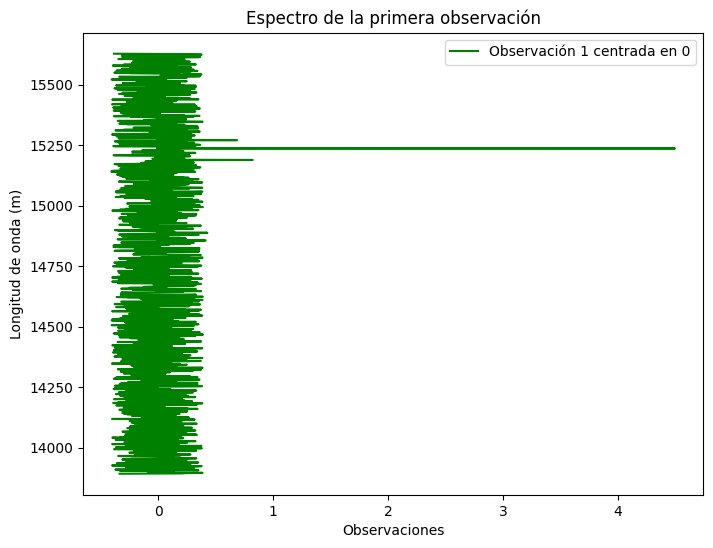

In [85]:
# Grafique el espectro centrado en 0 aquí
Valor_medio=data["obs_1"].mean()
data["obs_1"]=data["obs_1"]-Valor_medio

plt.figure(figsize=(8, 6))
plt.plot(data["obs_1"], data["Wlth"], label="Observación 1 centrada en 0", color="green")
plt.xlabel("Observaciones")
plt.ylabel("Longitud de onda (m)")
plt.title("Espectro de la primera observación")
plt.legend()
plt.show()

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [86]:
des_est=data["obs_1"].std()
media=data["obs_1"].mean()

ruido=data["obs_1"][(data["obs_1"]>media-3*des_est)&(data["obs_1"]<media+3*des_est)]

print("Desviación estandar: " + str(des_est))
print(ruido)

Desviación estandar: 0.25549698527356973
0      -0.338588
1       0.206785
2       0.232843
3       0.383761
4       0.001879
          ...   
1415   -0.318530
1416    0.375628
1417    0.196444
1418    0.156192
1419   -0.386687
Name: obs_1, Length: 1418, dtype: float64


2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

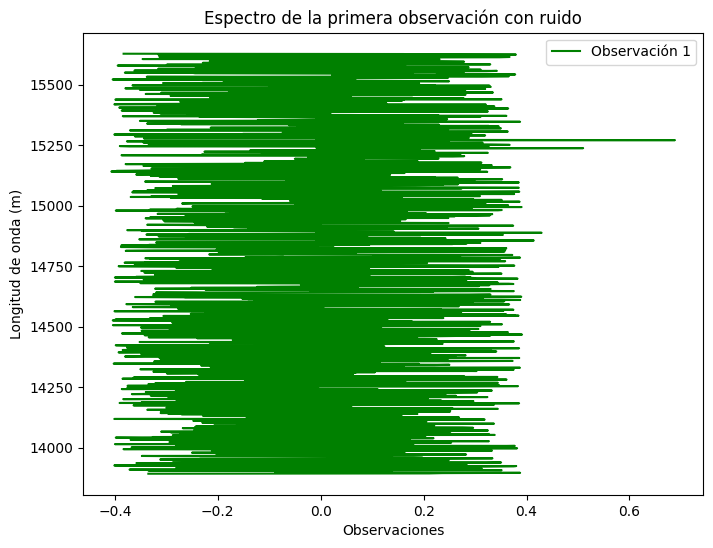

In [13]:
# Grafique el espectro centrado en 0 aquí
media_ruido=ruido.mean()
ruido_corregido=ruido-media_ruido

plt.figure(figsize=(8, 6))
plt.plot(ruido_corregido, data["Wlth"][ruido.index], color="green", label="Observación 1")
plt.xlabel("Observaciones")
plt.ylabel("Longitud de onda (m)")
plt.title("Espectro de la primera observación con ruido")
plt.legend()
plt.show()

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** Me parece adecuado elegir n=2300, ya que con este valor los márgenes contienen la linea de emisión hallada en el punto a)

Desviación estandar del ruido: 0.22495875092219347


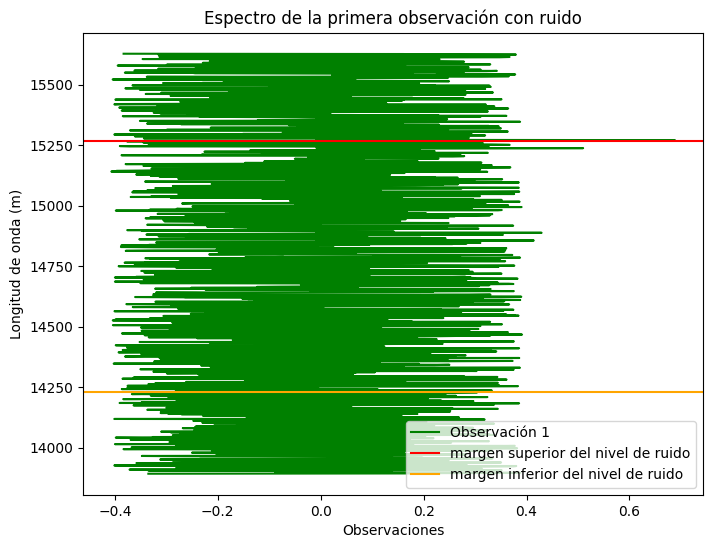

In [14]:
des_est_ruido=ruido.std()
print("Desviación estandar del ruido: " + str(des_est_ruido))
n=2300

plt.figure(figsize=(8, 6))
plt.plot(ruido_corregido, data["Wlth"][ruido.index], color="green", label="Observación 1")
plt.axhline(y=14750 + n * des_est_ruido, color='red', linestyle='-', label="margen superior del nivel de ruido")
plt.axhline(y=14750 -n * des_est_ruido, color='orange', linestyle='-', label="margen inferior del nivel de ruido")
plt.xlabel("Observaciones")
plt.ylabel("Longitud de onda (m)")
plt.title("Espectro de la primera observación con ruido")
plt.legend()
plt.show()

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [16]:
data_centrados =  data.copy()

for columna in data.columns:
  if columna.startswith('obs_'):
    data_centrados[columna] = data[columna] - data[columna].mean()

data_centrados.head() #para verificar

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,-0.338588,0.044869,0.129951,0.359538,0.198188,-0.227115,-0.221368,-0.289408,...,-0.158839,-0.164819,-0.044796,-0.102306,-0.271097,-0.114529,-0.233486,0.209442,-0.056625,-0.288435
1,1,13894.381791,0.206785,0.380884,-0.358213,0.280566,0.216748,0.290946,0.290598,-0.033806,...,-0.217811,-0.199941,0.105639,0.232304,-0.249997,-0.069033,0.021967,0.117012,0.385879,-0.207690
2,2,13895.604780,0.232843,-0.227997,0.207029,-0.107603,0.196148,0.126021,0.134662,-0.367846,...,0.211120,0.088938,-0.138135,0.233443,-0.077108,-0.053264,0.277885,-0.387821,0.121521,0.001465
3,3,13896.827769,0.383761,-0.150874,-0.076049,-0.389000,0.094101,0.359048,-0.188005,-0.111104,...,-0.162983,0.207134,0.187216,0.050933,-0.276596,0.227272,0.370489,-0.226952,-0.198362,-0.286895
4,4,13898.050759,0.001879,-0.112423,0.119651,0.347946,-0.325325,-0.036231,-0.368443,0.286873,...,-0.398619,-0.286268,-0.313202,0.025199,0.155341,0.078451,0.389573,-0.212684,-0.132831,-0.298107


2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [58]:
# Copia del DataFrame original
data_centrados = data.copy()

# Lista para almacenar los valores de sigma
sigmas = []

# Promedio acumulativo y cálculo de sigma
for i in range(1, 21):
    obs_columnas = [f'obs_{j}' for j in range(1, i + 1)]
    obs_promediados = data_centrados[obs_columnas].mean(axis=1)
    sigma = obs_promediados.std()
    sigmas.append(sigma)

# Añadir columna con el promedio de todos los espectros
data_centrados['obs_all'] = data_centrados[obs_columnas].mean(axis=1)

# Mostrar los valores de sigma
print("Valores de sigma:")
print(sigmas)

Valores de sigma:
[0.25549698527356973, 0.19803768628979346, 0.1709687216249224, 0.15772538831754362, 0.14848188156633854, 0.14056321107939018, 0.13777978975574795, 0.13298385994174516, 0.12915587062654124, 0.1261046681431102, 0.12412252277788964, 0.12130408735602112, 0.11991211070291964, 0.11966248432625935, 0.11770543642483135, 0.11764249058205381, 0.11722911511362766, 0.11612809225659639, 0.11555871366174529, 0.11447235766589442]


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** La desviación estándar va decreciendo, se debe a que el promedio de múltiples observaciones reduce la influencia del ruido aleatorio. El resultado es esperado, donde promediar datos ruidosos reduce la variabilidad, lo que se refleja en una menor desviación estándar.

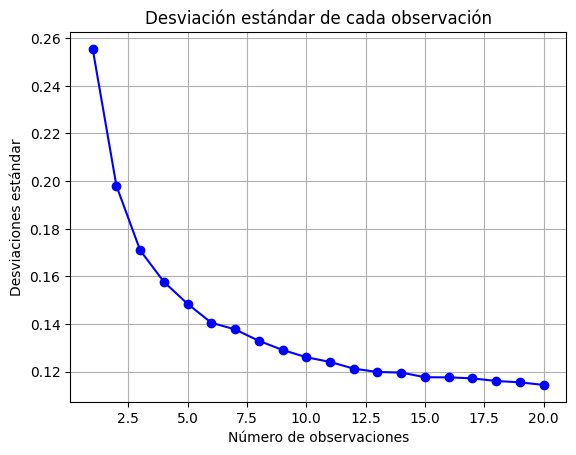

In [60]:
Nros_obs = np.arange(1,21) #numeros de observaciones

plt.plot(Nros_obs, sigmas, marker='o', color ="blue")
plt.xlabel('Número de observaciones')
plt.ylabel('Desviaciones estándar')
plt.title('Desviación estándar de cada observación')
plt.grid(True)
plt.show()

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** Se pueden observar 5 líneas de emisión, esto puede ser ya que se han corregido el ruido con los métodos de estadística númericos que usamos.

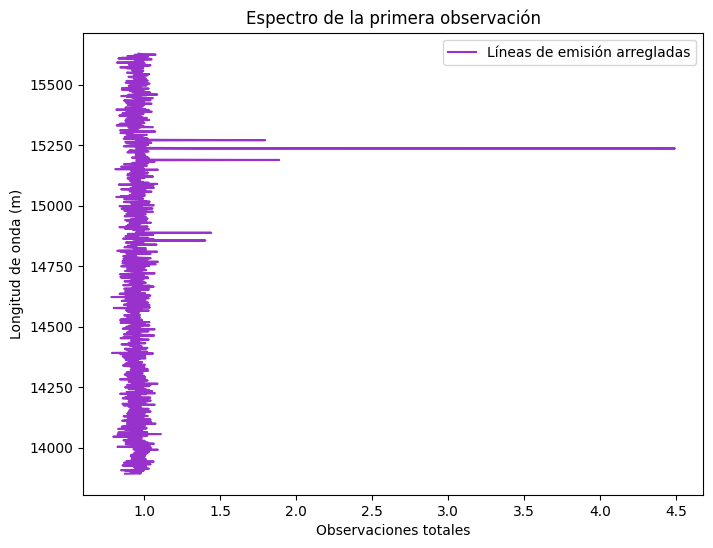

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(data_centrados["obs_all"], data["Wlth"], label="Líneas de emisión arregladas", color="darkorchid")
plt.xlabel("Observaciones totales")
plt.ylabel("Longitud de onda (m)")
plt.title("Espectro de la primera observación")
plt.legend()
plt.show()